___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

www.pieriandata.com
In this data project we will focus on exploratory data analysis of stock prices. This project is meant to practice  visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports


In [2]:
pip install pandas-datareader

In [3]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [4]:
df = pd.read_pickle('all_banks')

In [5]:
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [6]:
BAC = data.DataReader("BAC", 'yahoo', start='2006-01-01', end='2016-01-01')

In [7]:
C = data.DataReader("C", 'yahoo', start='2006-01-01', end='2016-01-01')
GS = data.DataReader("GS", 'yahoo', start='2006-01-01', end='2016-01-01')
JPM = data.DataReader("JPM", 'yahoo', start='2006-01-01', end='2016-01-01')
MS = data.DataReader("MS", 'yahoo', start='2006-01-01', end='2016-01-01')
WFC = data.DataReader("WFC", 'yahoo', start='2006-01-01', end='2016-01-01')

In [8]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [9]:
C.head()

High         Low        Open       Close     Volume  \
Date                                                                    
2006-01-03  493.799988  481.100006  490.000000  492.899994  1537600.0   
2006-01-04  491.000000  483.500000  488.600006  483.799988  1870960.0   
2006-01-05  487.799988  484.000000  484.399994  486.200012  1143160.0   
2006-01-06  489.000000  482.000000  488.799988  486.200012  1370210.0   
2006-01-09  487.399994  483.000000  486.000000  483.899994  1680740.0   

             Adj Close  
Date                    
2006-01-03  368.265411  
2006-01-04  361.466522  
2006-01-05  363.259735  
2006-01-06  363.259735  
2006-01-09  361.541229

In [10]:
GS.head()

High         Low        Open       Close     Volume  \
Date                                                                    
2006-01-03  129.440002  124.230003  126.699997  128.869995  6188700.0   
2006-01-04  128.910004  126.379997  127.349998  127.089996  4861600.0   
2006-01-05  127.320000  125.610001  126.000000  127.040001  3717400.0   
2006-01-06  129.250000  127.290001  127.290001  128.839996  4319600.0   
2006-01-09  130.619995  128.000000  128.500000  130.389999  4723500.0   

             Adj Close  
Date                    
2006-01-03  104.412056  
2006-01-04  102.969894  
2006-01-05  102.929390  
2006-01-06  104.387787  
2006-01-09  105.643600

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [11]:
bank_stocks = pd.concat([BAC , C , GS , JPM , MS , WFC ], keys=tickers,
          names= ['Bank Ticker','Stock Info'], axis=1)

** Set the column name levels (this is filled out for you):**

In [12]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [13]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.106030  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.743805  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.787273  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.736568  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.758289  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.114265  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.139038  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.238132  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  36.275295  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.659286  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.444870  
2006-01-04   31.799999  31.530001  10870000.0  20.207743  
2006-01-05   31.500000  31.495001  10158000.0  20.185305  
2006-01-06   31.580000  31.680000   8403800.0  20.303875  
2006-01-09   31.674999  31.674999   5619600.0  20.300667  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! 
** What is the max Close price for each bank's stock throughout the time period?**

In [14]:
bank_stocks.xs(key = 'Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [15]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [16]:
for tick in tickers:
    returns[tick+ ' Return'] = bank_stocks[tick]['Close'].pct_change()

In [17]:
returns.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.001110
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005874
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586   -0.000158

In [18]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BAC Return  2516 non-null   float64
 1   C Return    2516 non-null   float64
 2   GS Return   2516 non-null   float64
 3   JPM Return  2516 non-null   float64
 4   MS Return   2516 non-null   float64
 5   WFC Return  2516 non-null   float64
dtypes: float64(6)
memory usage: 137.6 KB


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

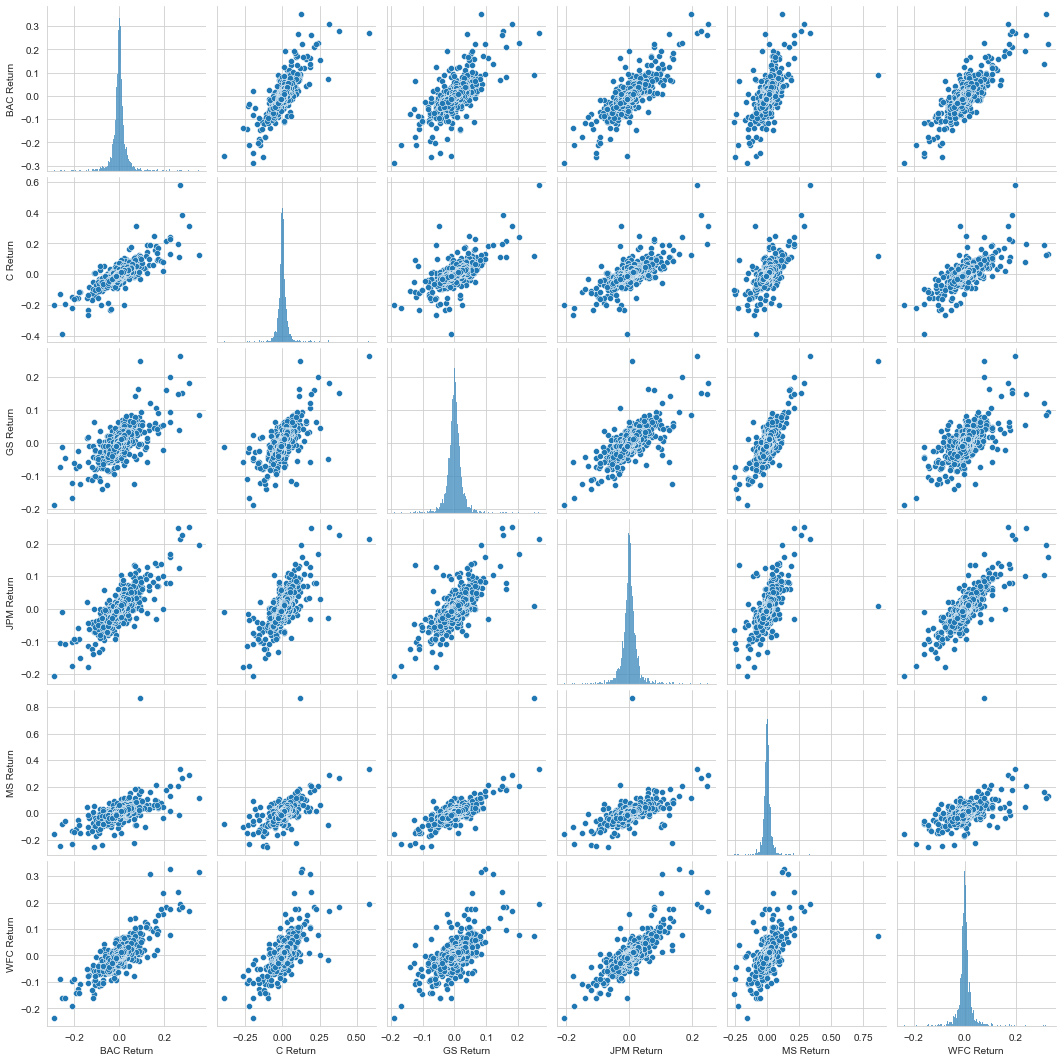

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
sns.pairplot(returns[1:]) #droping the first row

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**
ANSWER: Barack Obama, inaugurated as the 44th President of the United States of America, becomes the United States' first African-American president. how is that related? interesting...

In [20]:
# best and worst single day returns
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [21]:
returns.idxmin() # searching for each column the row index where the minimum is met (axis = 0), 

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [22]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [23]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

<AxesSubplot:ylabel='Count'>

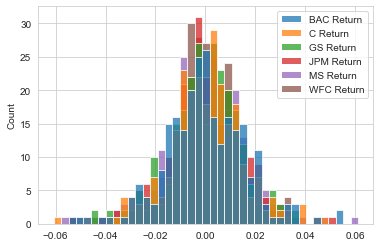

In [24]:
sns.histplot(data = returns.loc['2015-01-01':'2015-12-31']) #all banks cumulative=False

<AxesSubplot:xlabel='MS Return', ylabel='Count'>

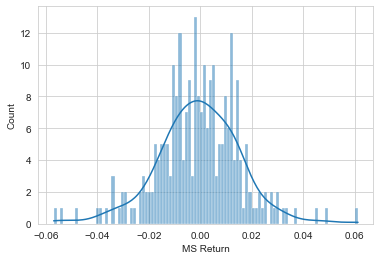

In [25]:
sns.histplot(data = returns['MS Return'].loc['2015-01-01':'2015-12-31'], bins = 100, kde = True) 

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

<AxesSubplot:xlabel='C Return', ylabel='Count'>

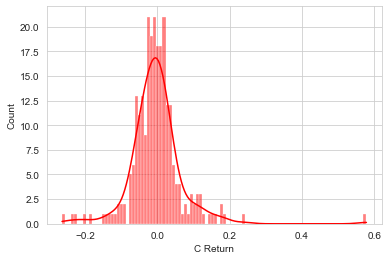

In [26]:
sns.histplot(data = returns['C Return'].loc['2008-01-01':'2008-12-31'], bins = 100, kde = True, color='red') 

# answer:
the Citigroup STD is streching ten times more than Morgan Stanley's! it is much riskier!
the bigger the return std is - the riskier the stock is, because it fluctuate alot

____
# More Visualization



Imports

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

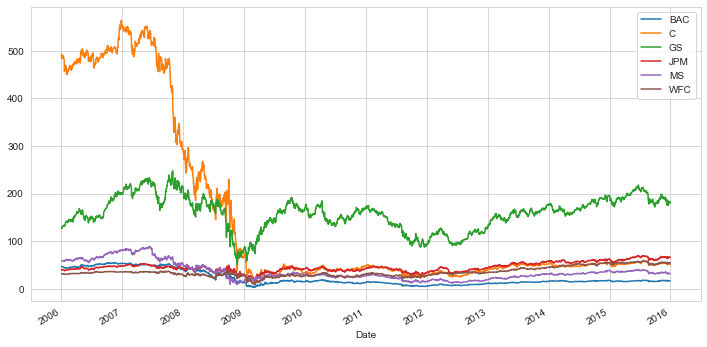

In [28]:

for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,6), label = tick)
plt.legend()
    

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

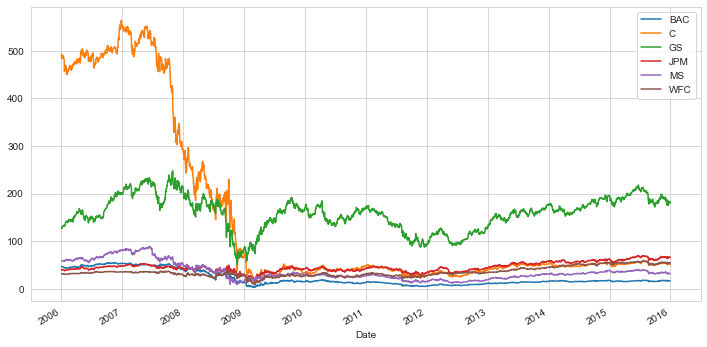

In [29]:
#Using Cross Section - .xs
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize = (12,6))
plt.legend()

In [30]:
#same only with iplot
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

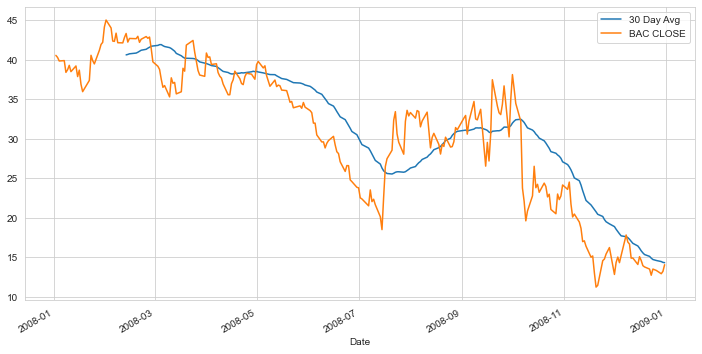

In [31]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

In [32]:
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().iplot()
BAC['Close'].loc['2008-01-01':'2009-01-01'].iplot()

** Create a heatmap of the correlation between the stocks Close Price.**

In [33]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.106030  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.743805  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.787273  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.736568  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.758289  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.114265  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.139038  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.238132  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  36.275295  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.659286  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.444870  
2006-01-04   31.799999  31.530001  10870000.0  20.207743  
2006-01-05   31.500000  31.495001  10158000.0  20.185305  
2006-01-06   31.580000  31.680000   8403800.0  20.303875  
2006-01-09   31.674999  31.674999   5619600.0  20.300667  

[5 rows x 36 columns]

In [34]:
bank_corr = bank_stocks.xs(key = 'Close', axis=1, level = 'Stock Info').corr()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

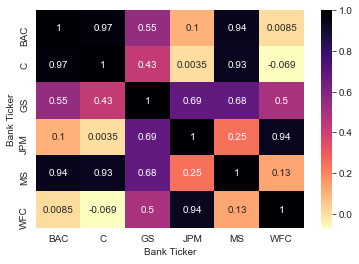

In [35]:
sns.heatmap(bank_corr, cmap='magma_r', annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

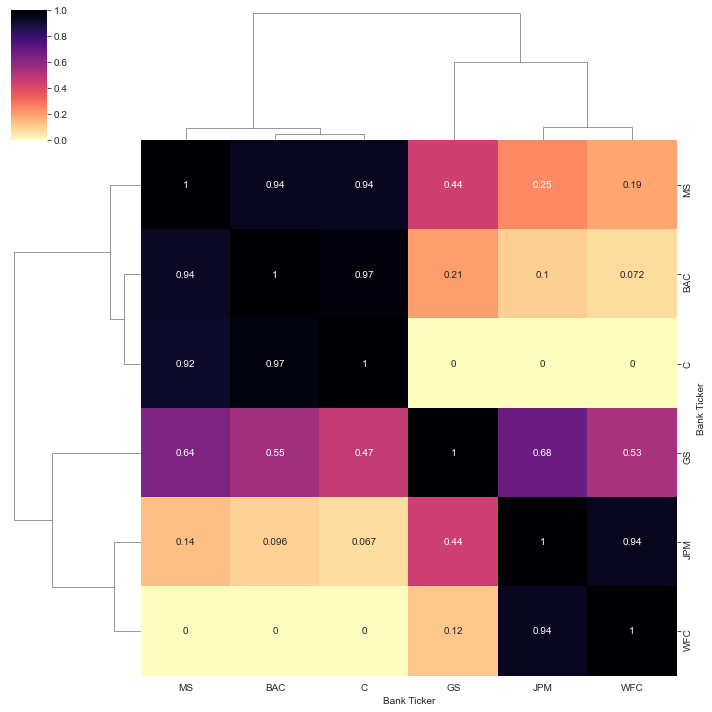

In [36]:
sns.clustermap(bank_corr, cmap='magma_r', annot=True, standard_scale=1)

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [37]:
BAC.loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [38]:
MS.loc['2015-01-01':'2016-01-01'].ta_plot(study='sma')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [39]:
BAC.loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# Thanks

Definitely a lot of more specific finance topics here.